In [5]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

import numpy 
import pandas as pd
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('./datasets/sonar.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [9]:
dataset = df.values
x = dataset[:, 0:60]
x = np.asarray(x).astype(np.float32) # dtype이 object인데 float으로 변경

y_obj = dataset[:, 60]

# 문자열 변환
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
model.fit(x, y, epochs=200, batch_size=5)

# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(x,y)[1]))

Epoch 1/200
42/42 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5048
Epoch 2/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.7019
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6923
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7163
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7740
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7260
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.7788
Epoch 8/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7596
Epoch 9/200
42/42 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7981
Epoch 10/200
42/42 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.8029
Epoch 11/

42/42 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9904
Epoch 84/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9856
Epoch 85/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9904
Epoch 86/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9952
Epoch 87/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9904
Epoch 88/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9904
Epoch 89/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 1.0000
Epoch 90/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 1.0000
Epoch 91/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9952
Epoch 92/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9904
Epoch 93/200


42/42 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 165/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 166/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 167/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 168/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 169/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 170/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 171/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 172/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 173/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoc

학습이 과도하게 많이 되었거나, 학습 데이터와 테스트 데이터가 중복이거나 층이 너무 많을 때, 과대 적합이 생길 수 있다.

 과대 적합 피하기 - trainset and testset split
 학습이 깊어져서 trainset에서만 학습 되면 testset에서 효과가 없다면 과대적합 발생으로 판단
 fit단계에서 validation_split 파라미터 설정 시 검증 단계 설정 가능

In [11]:
# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
history = model.fit(x, y, validation_split=0.3, epochs=200, batch_size=5)

# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(x,y)[1]))

Epoch 1/200
29/29 [==============================] - 1s 7ms/step - loss: 0.7099 - accuracy: 0.4483 - val_loss: 0.6935 - val_accuracy: 0.3492
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.6690 - val_loss: 0.6894 - val_accuracy: 0.4762
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.7379 - val_loss: 0.7383 - val_accuracy: 0.1587
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.7241 - val_loss: 0.7961 - val_accuracy: 0.0317
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6296 - accuracy: 0.7172 - val_loss: 0.8474 - val_accuracy: 0.0159
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.6897 - val_loss: 0.9002 - val_accuracy: 0.0159
Epoch 7/200
29/29 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.6897 - val_loss: 0.9211 - val_accuracy: 0.0476
Epoch 8/200
2

Epoch 59/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9379 - val_loss: 1.8533 - val_accuracy: 0.3810
Epoch 60/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9310 - val_loss: 1.7126 - val_accuracy: 0.3810
Epoch 61/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9379 - val_loss: 1.7051 - val_accuracy: 0.3968
Epoch 62/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9310 - val_loss: 1.6840 - val_accuracy: 0.3968
Epoch 63/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9379 - val_loss: 1.9183 - val_accuracy: 0.3810
Epoch 64/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.9241 - val_loss: 2.1431 - val_accuracy: 0.2857
Epoch 65/200
29/29 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9379 - val_loss: 1.5938 - val_accuracy: 0.3968
Epoch 

29/29 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9793 - val_loss: 2.4727 - val_accuracy: 0.3651
Epoch 117/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9724 - val_loss: 2.4413 - val_accuracy: 0.3651
Epoch 118/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9931 - val_loss: 2.2347 - val_accuracy: 0.3810
Epoch 119/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9793 - val_loss: 2.3965 - val_accuracy: 0.3651
Epoch 120/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9793 - val_loss: 2.7275 - val_accuracy: 0.3492
Epoch 121/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9931 - val_loss: 2.2828 - val_accuracy: 0.3810
Epoch 122/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.9724 - val_loss: 2.3972 - val_accuracy: 0.3810
Epoch 123/200

29/29 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 3.3283 - val_accuracy: 0.3810
Epoch 174/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 3.3912 - val_accuracy: 0.3651
Epoch 175/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 3.3476 - val_accuracy: 0.3810
Epoch 176/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 2.9159 - val_accuracy: 0.4286
Epoch 177/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 3.3949 - val_accuracy: 0.3810
Epoch 178/200
29/29 [==============================] - 0s 4ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 3.6480 - val_accuracy: 0.3651
Epoch 179/200
29/29 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 3.3358 - val_accuracy: 0.3968
Epoch 180/200

In [13]:
results = history.history

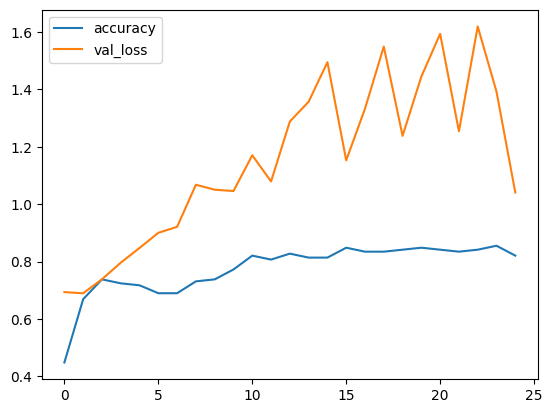

In [15]:
import matplotlib.pyplot as plt

plt.plot(results['accuracy'][0:25], label='accuracy')
plt.plot(results['val_loss'][0:25], label='val_loss')
plt.legend()
plt.show()

20, 24회 정도로 학습 횟수를 조정하면 과대적합을 피하고 오차를 줄일 수 있다.

In [16]:
# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
model.fit(x, y, epochs=200, batch_size=5)

# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(x,y)[1]))

Epoch 1/200
42/42 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5577
Epoch 2/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5721
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5577
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.5865
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.5962
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6202
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.6875
Epoch 8/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.6971
Epoch 9/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7356
Epoch 10/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7404
Epoch 11/

42/42 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9231
Epoch 84/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9087
Epoch 85/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9183
Epoch 86/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9135
Epoch 87/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9231
Epoch 88/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.8798
Epoch 89/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9135
Epoch 90/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9375
Epoch 91/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9327
Epoch 92/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9183
Epoch 93/200


42/42 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9904
Epoch 165/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9808
Epoch 166/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9904
Epoch 167/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9904
Epoch 168/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9904
Epoch 169/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9952
Epoch 170/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9904
Epoch 171/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9904
Epoch 172/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9952
Epoch 173/200
42/42 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9904
Epoc

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=120)

# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
model.fit(x_train, y_train, epochs=130, batch_size=5)

model.save('model.h5')

Epoch 1/130
29/29 [==============================] - 1s 2ms/step - loss: 0.7399 - accuracy: 0.3931
Epoch 2/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5793
Epoch 3/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5586
Epoch 4/130
29/29 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.5586
Epoch 5/130
29/29 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.6897
Epoch 6/130
29/29 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6828
Epoch 7/130
29/29 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.6966
Epoch 8/130
29/29 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7172
Epoch 9/130
29/29 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7862
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5399 - accuracy: 0.7724
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9862
Epoch 84/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9862
Epoch 85/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9862
Epoch 86/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9862
Epoch 87/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9793
Epoch 88/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 1.0000
Epoch 89/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9931
Epoch 90/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 1.0000
Epoch 91/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9862
Epoch 92/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9931
Epoch 93/130


In [ ]:
# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(x_test,y_test)[1]))